# 1. Importing data and visualzation libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Including the command for inline plotting
%matplotlib inline

In [3]:
# define path
PATH = 'Data'

In [4]:
# import cleaned dataset

df= pd.read_csv(os.path.join(PATH, 'Prepared Data', 'Netflix_Data_clean.csv'))

In [5]:
df.head(5)

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
1,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
2,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"
3,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies"
4,24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"


In [6]:
df.shape

(5336, 12)

In [7]:
df.columns

Index(['Unnamed: 0', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

# 2. Removing unnecessary variables

In [8]:
# craete a subset
df_netflix= df[['title', 'director', 'cast', 'country',
        'release_year', 'rating', 'duration', 'listed_in']]

In [9]:
df_netflix.head()

,title,director,cast,country,release_year,rating,duration,listed_in
0,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
1,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
2,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas"
3,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies"
4,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"


# 3. Create a correlation matrix heatmap (colored)

In [10]:
from sklearn.preprocessing import LabelEncoder # Use the LabelEncoder class 
#from the sklearn.preprocessing module to encode categorical variables into numerical values.

label_encoder = LabelEncoder()# encode the 'type' variable (movies vs. TV shows)
#where 'movie' is represented as 0 and 'TV show' as 1
df['Type_encoded'] = label_encoder.fit_transform(df['type'])

In [11]:
label_encoder = LabelEncoder()
df['Country_encoded'] = label_encoder.fit_transform(df['country'])

In [12]:
country_frequencies = df['country'].value_counts()# Count the number of titles available for each country.

In [13]:
correlation_matrix = df[['Type_encoded', 'Country_encoded']].corr()

In [14]:
correlation_matrix

,Type_encoded,Country_encoded
Type_encoded,1.000000,-0.008713
Country_encoded,-0.008713,1.000000


In [15]:
df.head(5)


,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Type_encoded,Country_encoded
0,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",0,536
1,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",1,409
2,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",0,490
3,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",0,167
4,24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",0,195


In [16]:
# create a subset
df_sub= df[['Type_encoded', 'Country_encoded']]

In [17]:
df_sub


,Type_encoded,Country_encoded
0,0,536
1,1,409
2,0,490
3,0,167
4,0,195
...,...,...
5331,0,403
5332,0,490
5333,0,490
5334,0,490


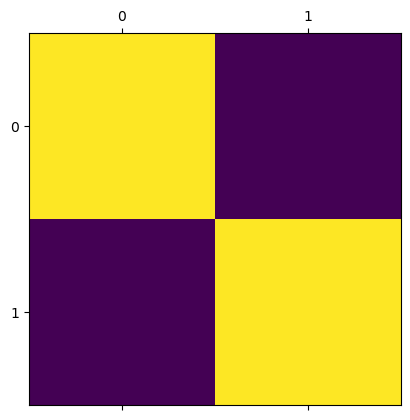

In [18]:
plt.matshow(df_sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

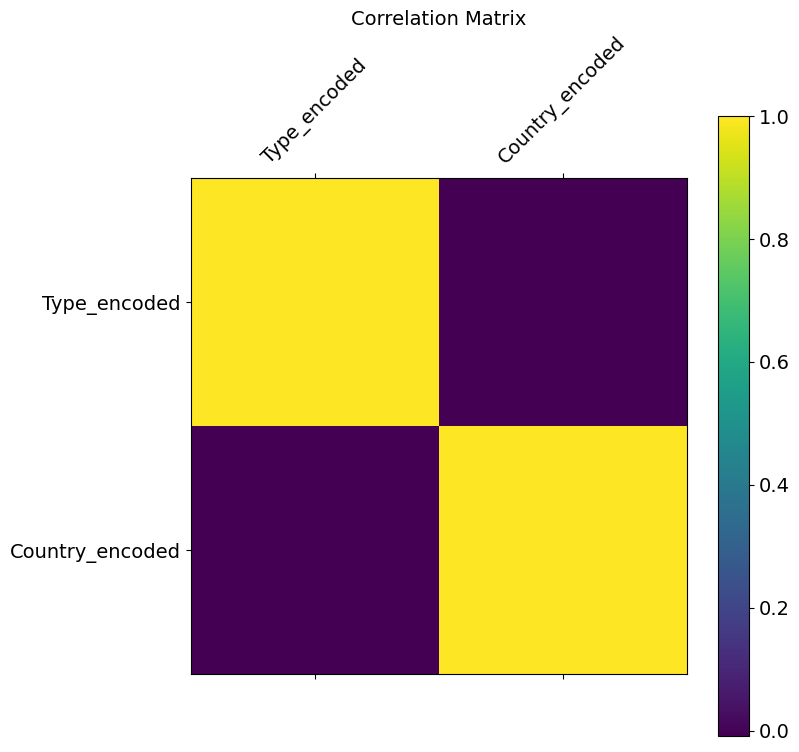

In [19]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [20]:
# What is the average duration of titles available on Netflix?

In [43]:
df['duration'] = df['duration'].astype(str).str.replace(' min', '').astype(float)

In [44]:
# Remove 'min' suffix and convert to float
df['duration'] = df['duration'].str.replace(' min', '').astype(float)

AttributeError: Can only use .str accessor with string values!

ValueError: could not convert string to float: 'Sankofa'

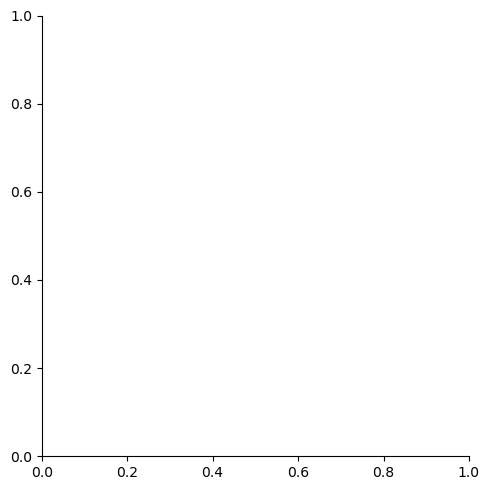

In [45]:
# Create a scatterplot for the "duration" and "title" columns in seaborn

sns.lmplot(x = 'duration', y = 'title', data = df)